# EDA

In this notebook I'll go through all columns in the datasets and have a first look at it.

It is highly inspired from this kernel: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt



## Imports

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Standard plotly imports
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
#import cufflinks
#import cufflinks as cf
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
#cufflinks.go_offline(connected=True)

## Data

In [5]:
df_identity = pd.read_csv('../data/raw/train_identity.csv')
df_transaction = pd.read_csv('../data/raw/train_transaction.csv')

## Functions

In [6]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [7]:
def plot_cnt_distribution(df, col, order_by_most_frequent=True):
    
    tmp = pd.crosstab(df_transaction[col], df_transaction['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    #tmp.sort_values("NoFraud", ascending=False, inplace=True)
    
    relative = pd.DataFrame(df[col].value_counts())
    relative = relative.assign(relative = relative[col] / total)
    relative = relative.reset_index()
    relative = relative[["index", "relative"]]
    relative.columns = [str(col), "relative"]
    tmp = pd.merge(tmp, relative)
    if order_by_most_frequent:
        tmp = tmp.sort_values('relative', ascending=False)
    
    plt.figure(figsize=(20,10));
    plt.suptitle('{} Distribution'.format(col), fontsize=24)
    plt.subplot(211)
    g1 = sns.countplot(x=col, data=df, order=list(tmp[col].values), label="Count of {}".format(col));
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                   color='black', legend=True, label="Nr. of Frauds")
    g1.set_title('Countplot of all distributions');
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45);
    #g1.legend()

    for p in g1.patches:
            height = p.get_height()
            g1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center",fontsize=12) 

    plt.subplot(212)
    g1 = sns.countplot(x=col, hue='isFraud', data=df, order=list(tmp[col].values));
    g1.set_title('Countplot with target fraud yes / no');
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45);


    for p in g1.patches:
            height = p.get_height()
            g1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center",fontsize=12) 

            
    plt.subplots_adjust(hspace=.4, top = 0.9)

In [8]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fraud Distribution

In [10]:
# Total Count of entries
total = df_transaction.count()["TransactionID"]

In [11]:
df_transaction.isFraud.unique()

array([0, 1])

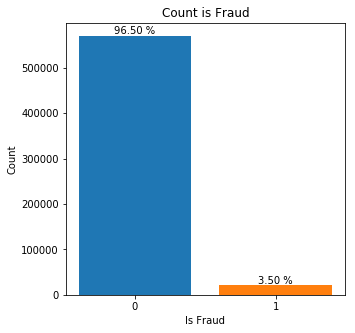

In [12]:
x = df_transaction.isFraud.unique()
y = df_transaction.groupby(df_transaction.isFraud).count()["TransactionID"]

fig, ax = plt.subplots(figsize=(5,5))

ax.bar(x, y, color=['tab:blue', 'tab:orange']);
ax.set_xticks(range(0,2));
ax.set_xticklabels(x);
ax.set_title("Count is Fraud");
ax.set_xlabel("Is Fraud");
ax.set_ylabel("Count");

rects = ax.patches

# Make some labels.
labels = [(y[0] / y.sum() * 100), (y[1] / y.sum() * 100)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:.2f} %".format(label),
            ha='center', va='bottom')

## TransactionDT

The competition description says: _The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp)._



In [13]:
df_transaction.TransactionDT.head()

0    86400
1    86401
2    86469
3    86499
4    86506
Name: TransactionDT, dtype: int64

In [14]:
df_transaction.TransactionDT.describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [15]:
import datetime

# Pick any starte date to reconstruct time
START_DATE = '2017-12-01'

startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
df_transaction['Date'] = df_transaction['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
df_transaction['weekday'] = df_transaction['Date'].dt.dayofweek
df_transaction['hours'] = df_transaction['Date'].dt.hour
df_transaction['days'] = df_transaction['Date'].dt.day

In [16]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V334,V335,V336,V337,V338,V339,Date,weekday,hours,days
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:00,5,0,2
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:01,5,0,2
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:01:09,5,0,2
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:01:39,5,0,2
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-02 00:01:46,5,0,2


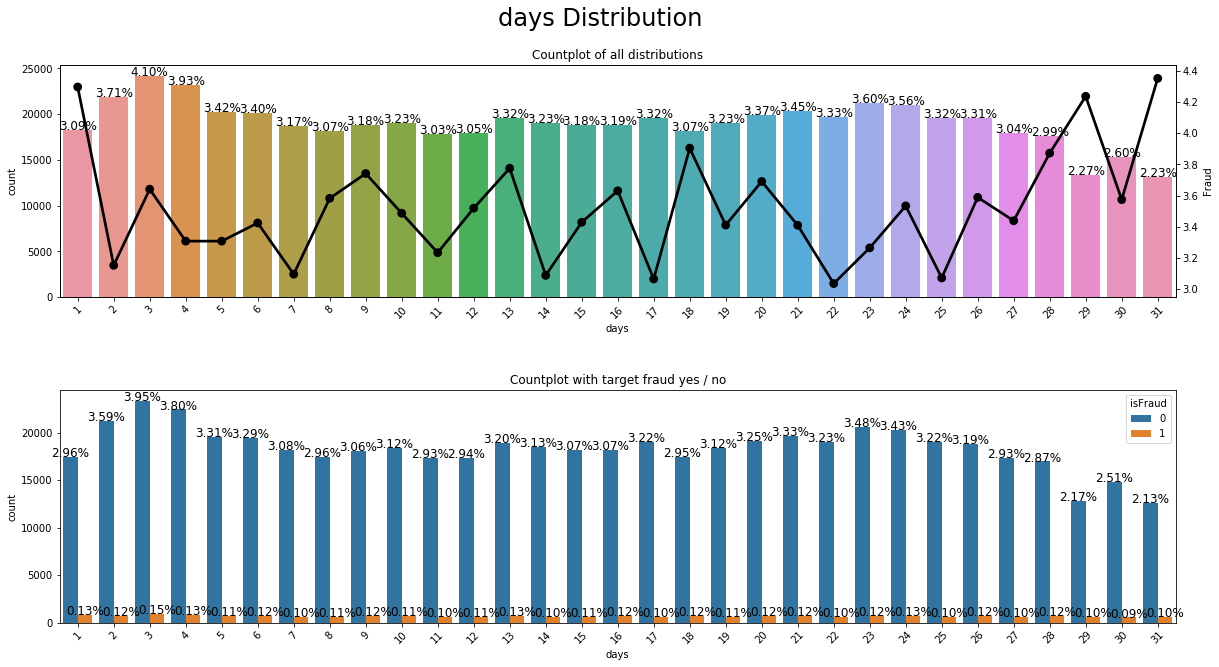

In [17]:
plot_cnt_distribution(df_transaction, 'days', False)

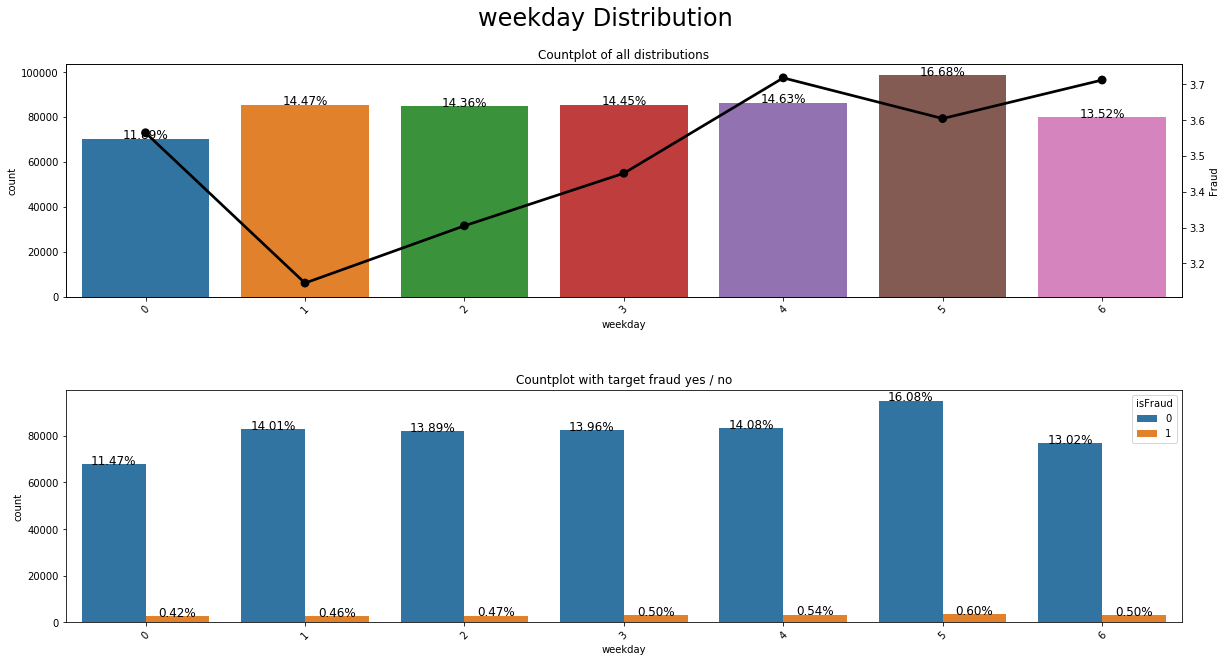

In [18]:
plot_cnt_distribution(df_transaction, 'weekday', False)

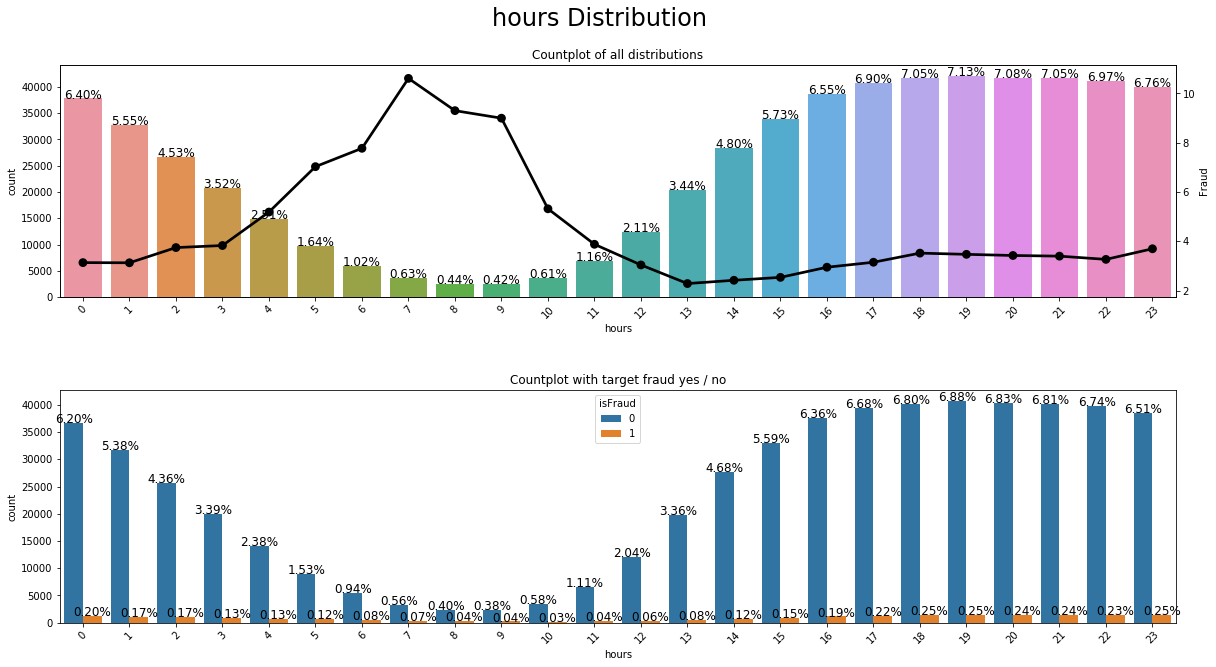

In [19]:
plot_cnt_distribution(df_transaction, 'hours', False)

### Plotting timeseries amounts

In [20]:
#seting some static color options
color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

dates_temp = df_transaction.loc[:, ["Date", "TransactionID", "TransactionAmt"]].set_index("Date").resample("D").count()
dates_temp = dates_temp.assign(Date = dates_temp.index)
dates_temp.head()

,TransactionID,TransactionAmt,Date
Date,,,
2017-12-02,5122,5122,2017-12-02
2017-12-03,3730,3730,2017-12-03
2017-12-04,3241,3241,2017-12-04
2017-12-05,4036,4036,2017-12-05
2017-12-06,3964,3964,2017-12-06


In [21]:
# creating the first trace with the necessary parameters
trace = go.Scatter(x=dates_temp['Date'], y=dates_temp.TransactionAmt, 
                   opacity = 0.8, line = dict(color = color_op[7]), name= 'Total Transactions')

In [22]:
# creating figure with the both traces and layout
fig = dict(data= [trace])

#rendering the graphs
iplot(fig) #it's an equivalent to plt.show()

## Transaction Amounts

In [23]:
# Transaction amounts
df_transaction.TransactionAmt.describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

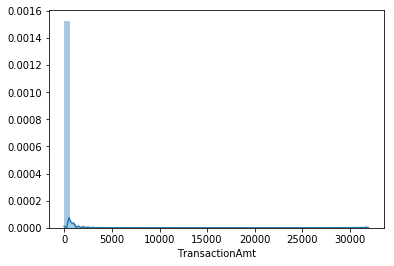

In [24]:
sns.distplot(df_transaction['TransactionAmt']);

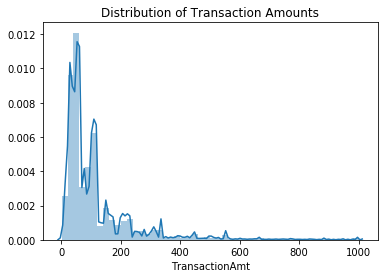

In [25]:
plot = sns.distplot(df_transaction[df_transaction['TransactionAmt'] <= 1000]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts");

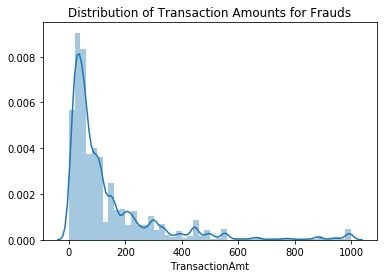

In [26]:
plot = sns.distplot(df_transaction[(df_transaction['TransactionAmt'] <= 1000) & (df_transaction.isFraud == 1)]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts for Frauds");

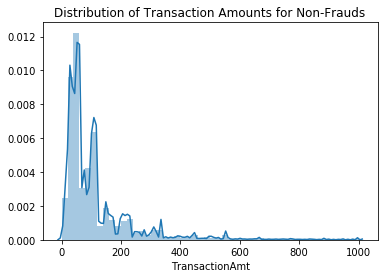

In [27]:
plot = sns.distplot(df_transaction[(df_transaction['TransactionAmt'] <= 1000) & (df_transaction.isFraud == 0)]['TransactionAmt'])
plot.set_title("Distribution of Transaction Amounts for Non-Frauds");

## ProductCD

-> Categorical

In [28]:
df_transaction.ProductCD.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [29]:
df_transaction.groupby(df_transaction.ProductCD).count()["TransactionID"]

ProductCD
C     68519
H     33024
R     37699
S     11628
W    439670
Name: TransactionID, dtype: int64

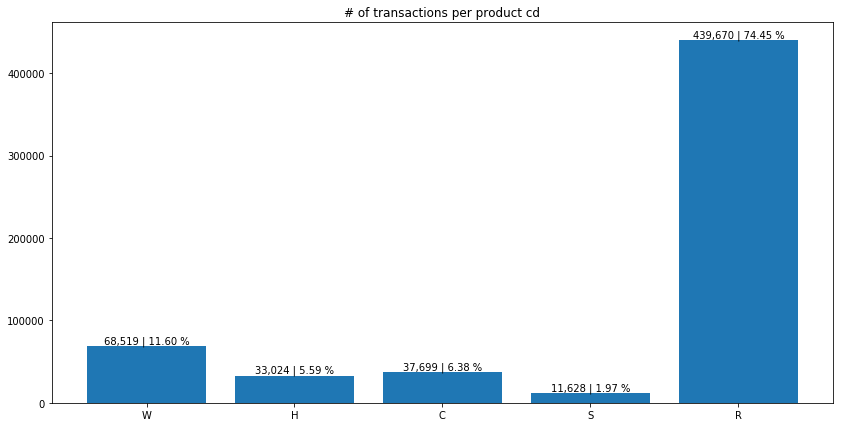

In [30]:
fig, ax = plt.subplots(figsize=(14,7))

x = df_transaction.ProductCD.unique()
y = df_transaction.groupby(df_transaction.ProductCD).count()["TransactionID"]

ax.bar(x, y);
ax.set_title("# of transactions per product cd");

rects = ax.patches

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')

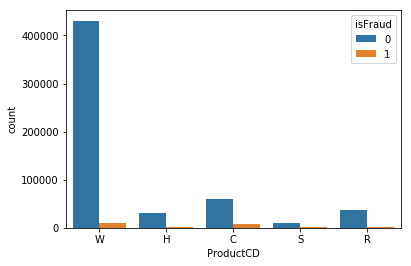

In [31]:
g1 = sns.countplot(x='ProductCD', hue='isFraud', data=df_transaction)

In [32]:
tmp = pd.crosstab(df_transaction['ProductCD'], df_transaction['isFraud'], normalize='index') * 100
tmp 

isFraud,0,1
ProductCD,,
C,88.312731,11.687269
H,95.233769,4.766231
R,96.217406,3.782594
S,94.100447,5.899553
W,97.960061,2.039939


## Card Features

-> Categorical

In [33]:
df_cards = df_transaction.loc[:, 'card1':'card6']

In [34]:
df_cards.head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [35]:
df_cards.describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [36]:
df_cards.isna().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

In [37]:
for col in df_cards.columns:
    print("{} nunique: {}".format(col, df_cards[col].nunique()))

card1 nunique: 13553
card2 nunique: 500
card3 nunique: 114
card4 nunique: 4
card5 nunique: 119
card6 nunique: 4


In [38]:
df_cards.dtypes

card1      int64
card2    float64
card3    float64
card4     object
card5    float64
card6     object
dtype: object

In [39]:
df_cards.head(10)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
5,5937,555.0,150.0,visa,226.0,debit
6,12308,360.0,150.0,visa,166.0,debit
7,12695,490.0,150.0,visa,226.0,debit
8,2803,100.0,150.0,visa,226.0,debit
9,17399,111.0,150.0,mastercard,224.0,debit


__1, 2, 5 seem to be numerical values__


In [40]:
df_cards_numerical = df_cards.loc[:,["card1", "card2", "card3", "card5"]]

In [41]:
df_cards_numerical.describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [42]:
df_cards_numerical.card3.unique()

array([150., 117., 185., 143., 144., 163., 146., 191., 162., 119., 147.,
       100., 135., 137., 138., 102., 213., 106., 214., 148., 210., 203.,
       194., 141., 225.,  nan, 188., 193., 208., 133., 223., 134., 153.,
       131., 200., 149., 116., 222., 220., 197., 129., 206., 195., 204.,
       127., 142., 111., 159., 118., 229., 217., 212., 227., 166., 189.,
       120., 171., 190., 105., 130., 170., 180., 177., 132., 109., 198.,
       121., 183., 215., 156., 207., 186., 167., 152., 199., 219., 202.,
       126., 182., 123., 107., 221., 124., 231., 157., 136., 128., 168.,
       101., 108., 125., 211., 164., 160., 161., 179., 155., 169., 205.,
       209., 226., 174., 176., 181., 224., 122., 201., 175., 139., 172.,
       114., 228., 184., 151., 173.])

In [43]:
df_cards_numerical.card2.isna().sum()

8933

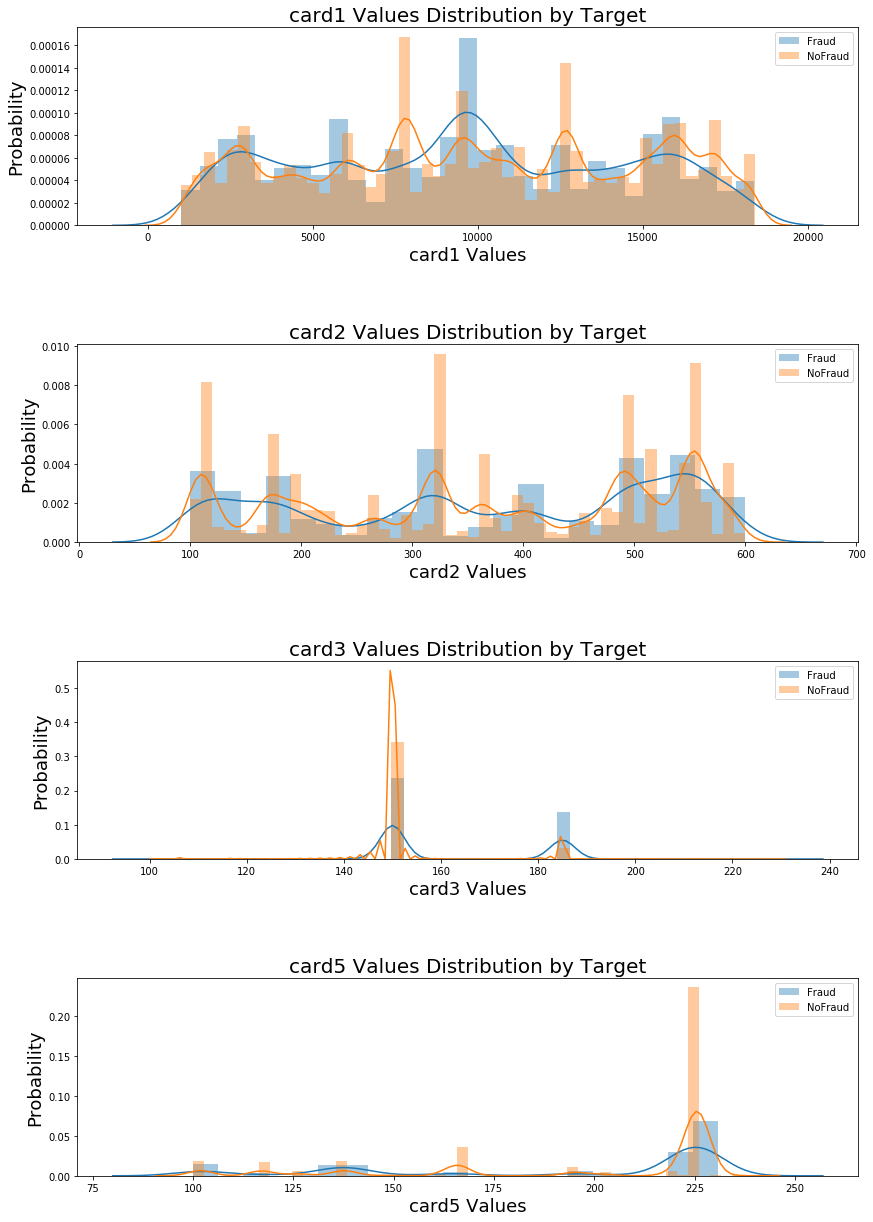

In [44]:
plt.figure(figsize=(14,22))
plt.tight_layout();

for i, col in enumerate(df_cards_numerical.columns, start=1):
    grid = "41" + str(i)
    plt.subplot(int(grid))
    g = sns.distplot(df_transaction[df_transaction['isFraud'] == 1][col].dropna(), label='Fraud')
    g = sns.distplot(df_transaction[df_transaction['isFraud'] == 0][col].dropna(), label='NoFraud')
    g.legend()
    g.set_title("{} Values Distribution by Target".format(col), fontsize=20)
    g.set_xlabel("{} Values".format(col), fontsize=18)
    g.set_ylabel("Probability", fontsize=18)
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)

In [45]:
df_transaction.groupby(df_transaction.card4).count()["TransactionID"]

card4
american express      8328
discover              6651
mastercard          189217
visa                384767
Name: TransactionID, dtype: int64

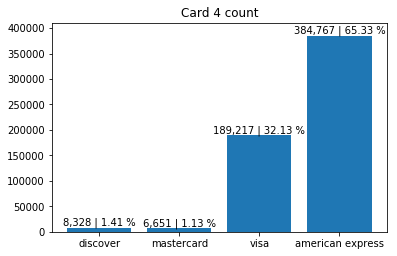

In [46]:
# Card 4
fig, ax = plt.subplots()

x = df_transaction.card4.dropna().unique()
y = df_transaction.groupby("card4").count()["TransactionID"]

ax.bar(x, y);


rects = ax.patches;

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')
    
ax.set_title("Card 4 count");
ax.set_ylim(top=410000)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

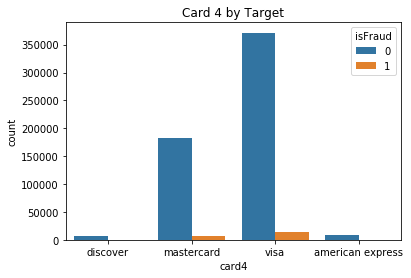

In [47]:
plot = sns.countplot(x="card4", hue="isFraud", data=df_transaction)
plot.set_title("Card 4 by Target");


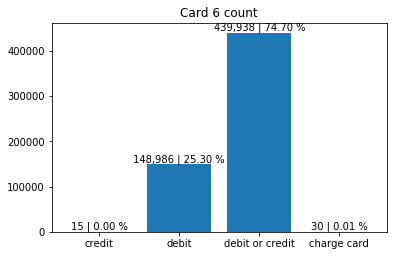

In [48]:
# Card 6
fig, ax = plt.subplots()

x = df_transaction.card6.dropna().unique()
y = df_transaction.groupby("card6").count()["TransactionID"]

ax.bar(x, y);


rects = ax.patches;

# Make some labels.
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f} %".format(label, (label / y.sum() * 100)),
            ha='center', va='bottom')
    
ax.set_title("Card 6 count");
#ax.set_ylim(top=500000);

plt.subplots_adjust(hspace = 0.6, top = 0.85)

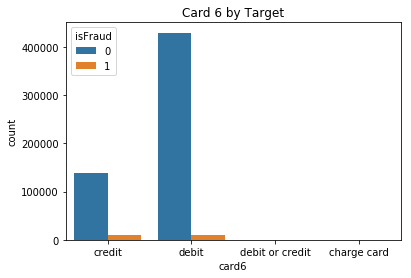

In [49]:
plot = sns.countplot(x="card6", hue="isFraud", data=df_transaction)
plot.set_title("Card 6 by Target");


## Address Features

-> Categorical (id of address?)

In [50]:
df_transaction[["addr1", "addr2"]].head()

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0


In [51]:
df_transaction[["addr1", "addr2"]].describe()

,addr1,addr2
count,524834.000000,524834.000000
mean,290.733794,86.800630
std,101.741072,2.690623
min,100.000000,10.000000
25%,204.000000,87.000000
50%,299.000000,87.000000
75%,330.000000,87.000000
max,540.000000,102.000000


In [52]:
df_transaction[["addr1", "addr2"]].isna().sum()

addr1    65706
addr2    65706
dtype: int64

In [53]:
df_transaction.addr1.nunique()

332

In [54]:
df_transaction.addr2.nunique()

74

In [55]:
sorted(df_transaction.groupby("addr1").count()["TransactionID"], reverse=True)[:10]

[46335, 42751, 42020, 39870, 26287, 23078, 20827, 20141, 16105, 15243]

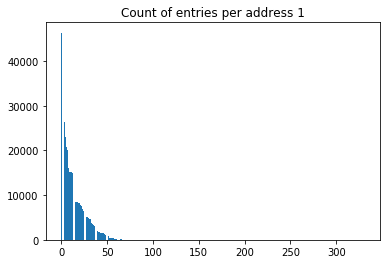

In [56]:
plt.bar(range(0,df_transaction.addr1.nunique()), sorted(df_transaction.groupby("addr1").count()["TransactionID"], reverse=True));
plt.title('Count of entries per address 1');

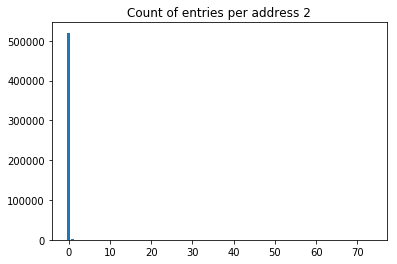

In [57]:
plt.bar(range(0,df_transaction.addr2.nunique()), sorted(df_transaction.groupby("addr2").count()["TransactionID"], reverse=True));
plt.title('Count of entries per address 2');

__All addresses with less than 5000 (addr1) and 50 (addr2) will be put into the category others__

In [58]:
# All with less than 5000 -> Other
df_transaction.loc[df_transaction.addr1.isin(df_transaction.addr1.value_counts()[df_transaction.addr1.value_counts() <= 5000].index), 'addr1'] = "Others"


In [59]:
df_transaction.loc[df_transaction.addr2.isin(df_transaction.addr2.value_counts()[df_transaction.addr2.value_counts() <= 50].index), 'addr2'] = "Others"

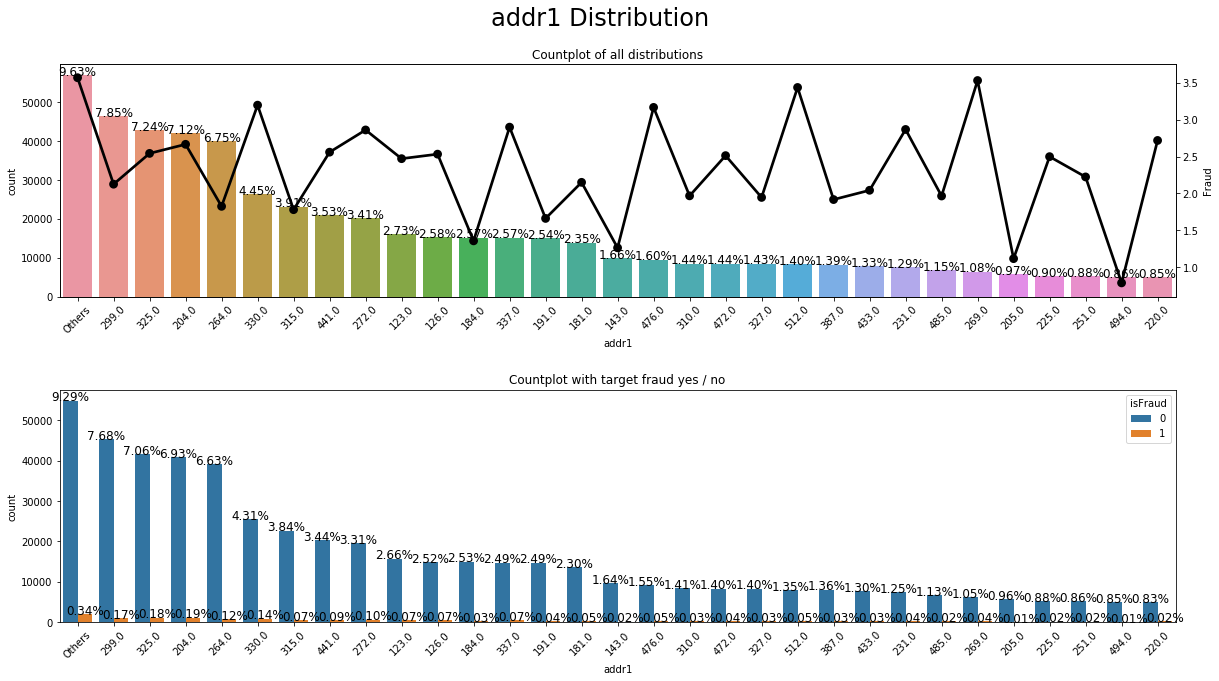

In [60]:
plot_cnt_distribution(df_transaction, 'addr1')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


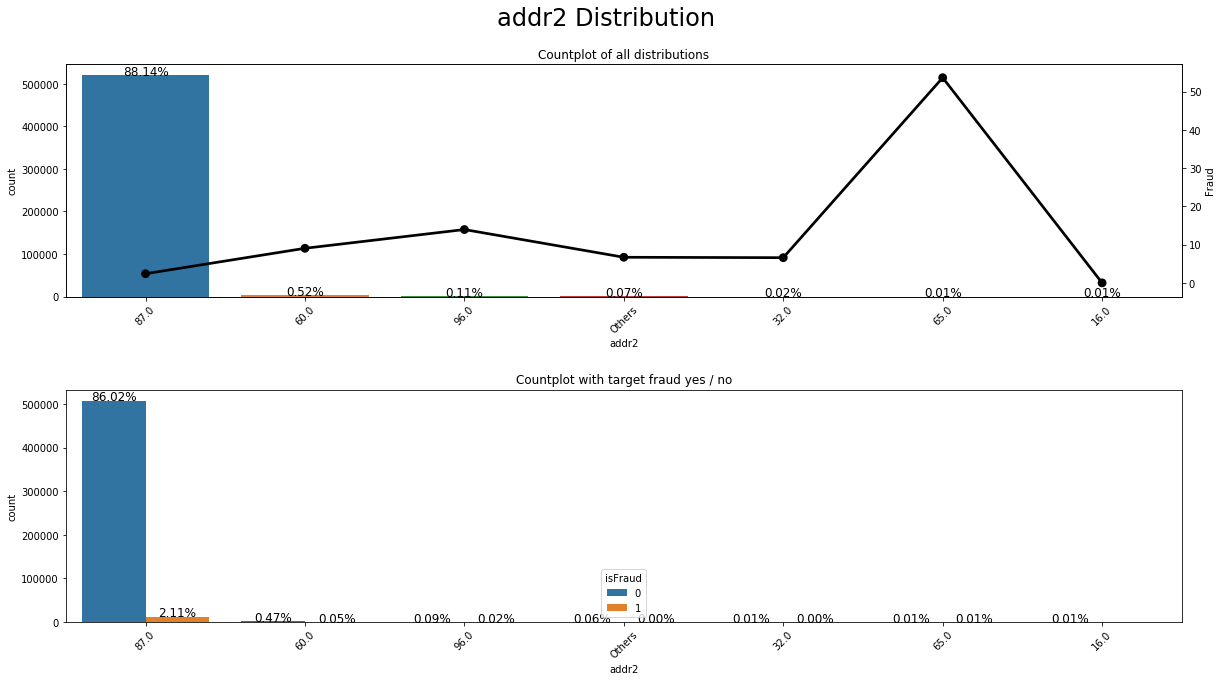

In [61]:
plot_cnt_distribution(df_transaction, 'addr2')

## Dist 1 & Dist 2 Col

- Not sure what these columns are

In [62]:
df_transaction[["dist1", "dist2"]].head()

,dist1,dist2
0,19.0,NaN
1,NaN,NaN
2,287.0,NaN
3,NaN,NaN
4,NaN,NaN


In [63]:
df_transaction[["dist1", "dist2"]].describe()

,dist1,dist2
count,238269.000000,37627.000000
mean,118.502180,231.855423
std,371.872026,529.053494
min,0.000000,0.000000
25%,3.000000,7.000000
50%,8.000000,37.000000
75%,24.000000,206.000000
max,10286.000000,11623.000000


In [64]:
df_transaction[["dist1", "dist2"]].isna().sum()

dist1    352271
dist2    552913
dtype: int64

In [65]:
df_transaction[["dist1", "dist2"]].fillna(-1, inplace=True)

## E-Mail column

- Categorical varilable with e-mail provider
- Most common google, yahoo, no information

In [66]:
# Merge some e-mail providers together
df_transaction.loc[df_transaction['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

df_transaction.loc[df_transaction['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr','yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'

df_transaction.loc[df_transaction['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr','hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

df_transaction.loc[df_transaction.P_emaildomain.isin(df_transaction.P_emaildomain\
                                                     .value_counts()[df_transaction.P_emaildomain.value_counts() <= 500 ].index),'P_emaildomain'] = "Others"

df_transaction.P_emaildomain.fillna("NoInf", inplace=True)

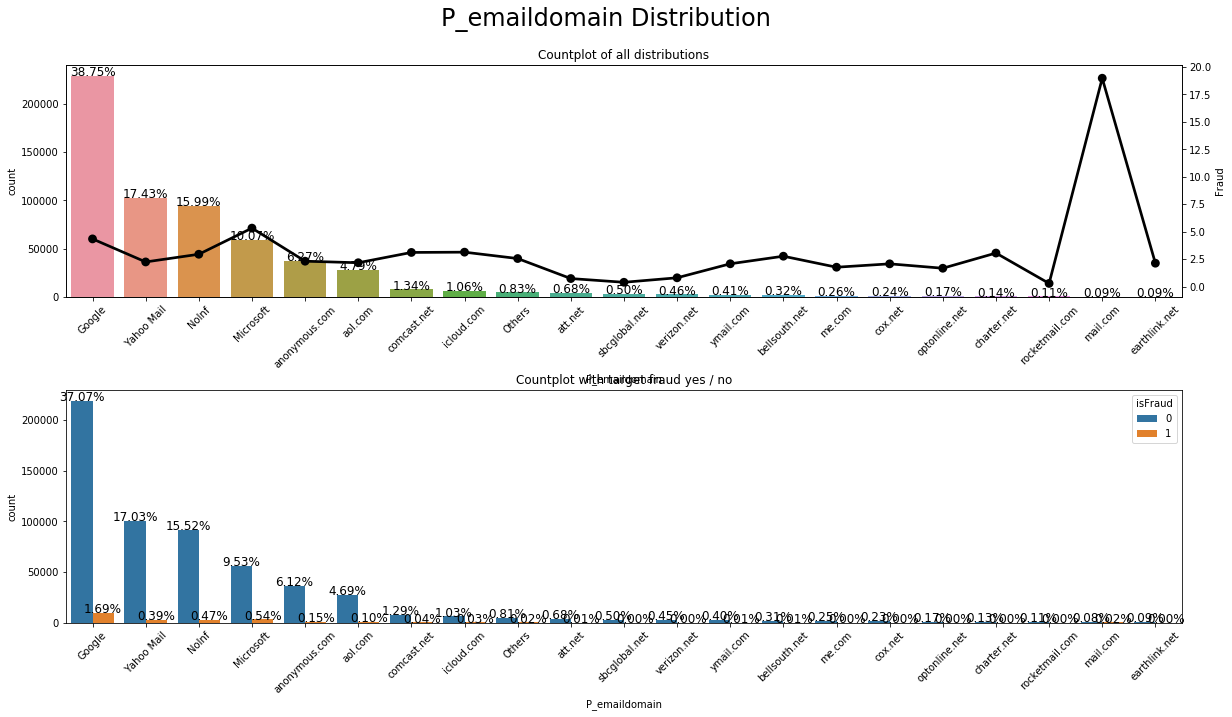

In [67]:
plot_cnt_distribution(df_transaction, 'P_emaildomain')

__From mail.com are almost 20% fraud!__

## R_emaildomain

In [68]:
df_transaction.R_emaildomain.describe()

count        137291
unique           60
top       gmail.com
freq          57147
Name: R_emaildomain, dtype: object

In [69]:
# Merge some e-mail providers together
df_transaction.loc[df_transaction['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

df_transaction.loc[df_transaction['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr','yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'

df_transaction.loc[df_transaction['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr','hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

df_transaction.loc[df_transaction.R_emaildomain.isin(df_transaction.R_emaildomain\
                                                     .value_counts()[df_transaction.R_emaildomain.value_counts() <= 300 ].index),'R_emaildomain'] = "Others"

df_transaction.R_emaildomain.fillna("NoInf", inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


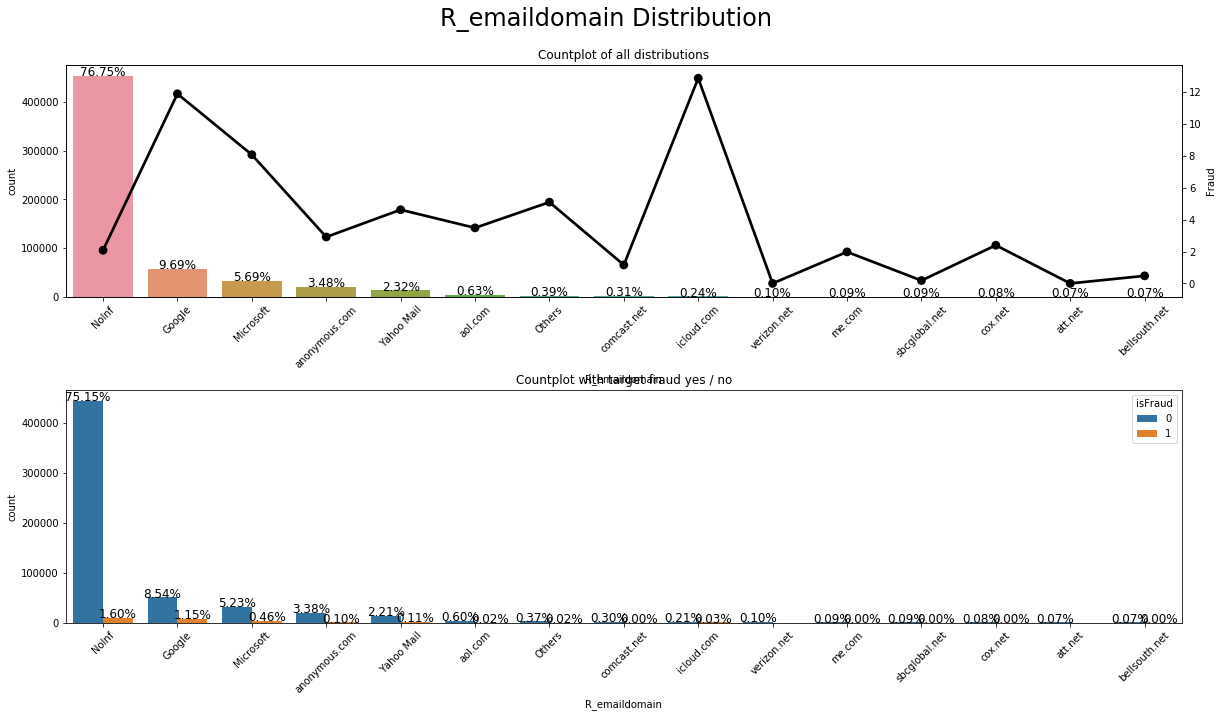

In [70]:
plot_cnt_distribution(df_transaction, 'R_emaildomain')

## C1-C14

- Counting 
- E.g. how many addresses are found to be associated with payment card, etc.

In [71]:
df_transaction.loc[:, 'C1': 'C14'].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [72]:
df_transaction.loc[:, 'C1': 'C14'].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [73]:
resumetable(df_transaction.loc[:, 'C1': 'C14'])

Dataset Shape: (590540, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,C1,float64,0,1657,1.0,1.0,1.0,2.72
1,C2,float64,0,1216,1.0,1.0,1.0,2.75
2,C3,float64,0,27,0.0,0.0,0.0,0.04
3,C4,float64,0,1260,0.0,0.0,0.0,1.12
4,C5,float64,0,319,0.0,0.0,0.0,2.06
5,C6,float64,0,1328,1.0,1.0,1.0,2.52
6,C7,float64,0,1103,0.0,0.0,0.0,0.71
7,C8,float64,0,1253,0.0,0.0,0.0,1.25
8,C9,float64,0,205,1.0,0.0,1.0,2.62
9,C10,float64,0,1231,0.0,0.0,0.0,1.23


Current C:  C1
Current C:  C2
Current C:  C3
Current C:  C4
Current C:  C5
Current C:  C6
Current C:  C7
Current C:  C8
Current C:  C9
Current C:  C10
Current C:  C11
Current C:  C12
Current C:  C13
Current C:  C14


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


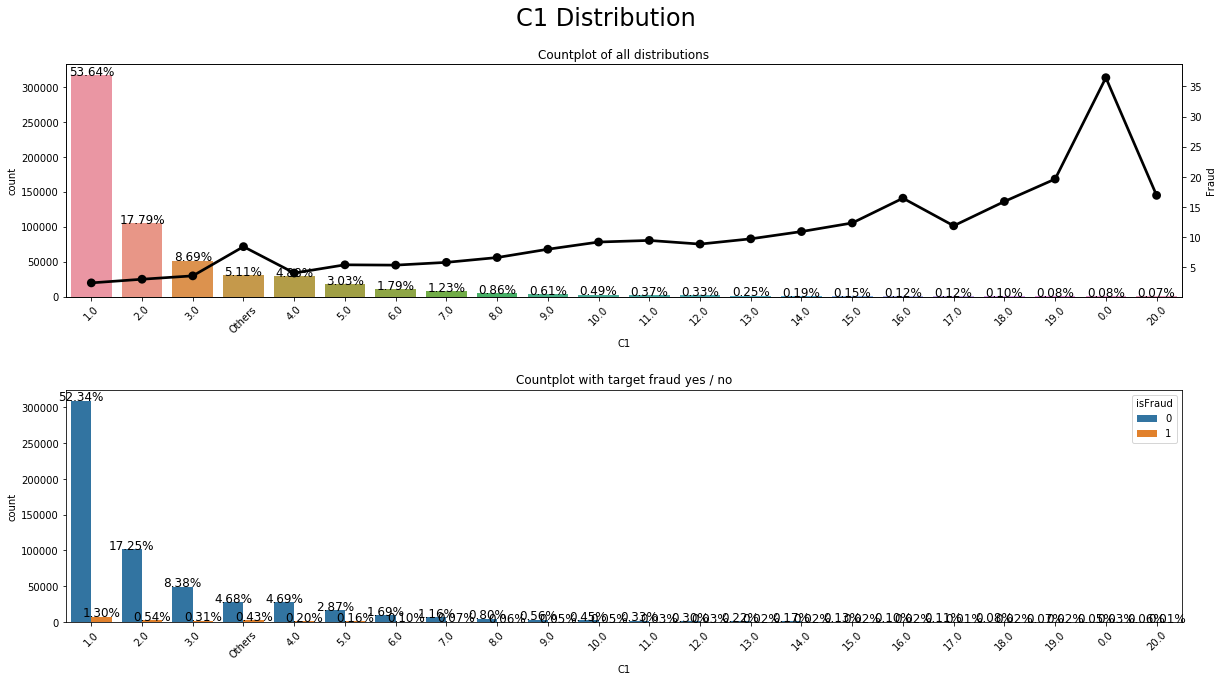

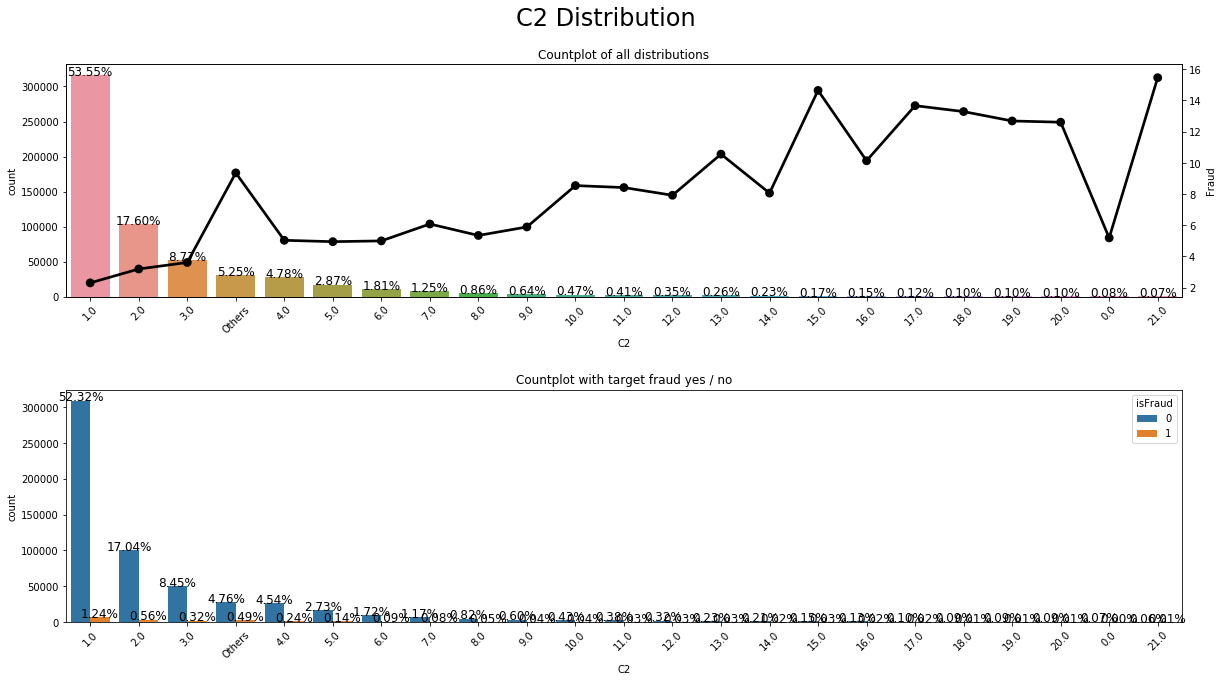

posx and posy should be finite values
posx and posy should be finite values


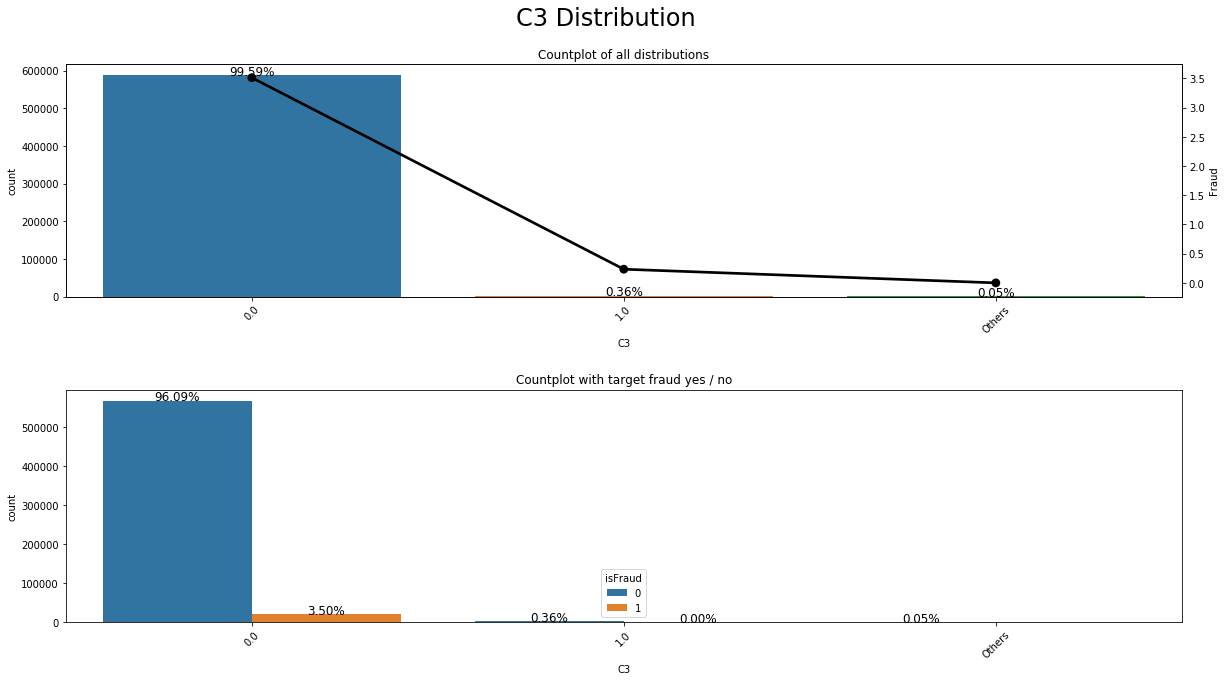

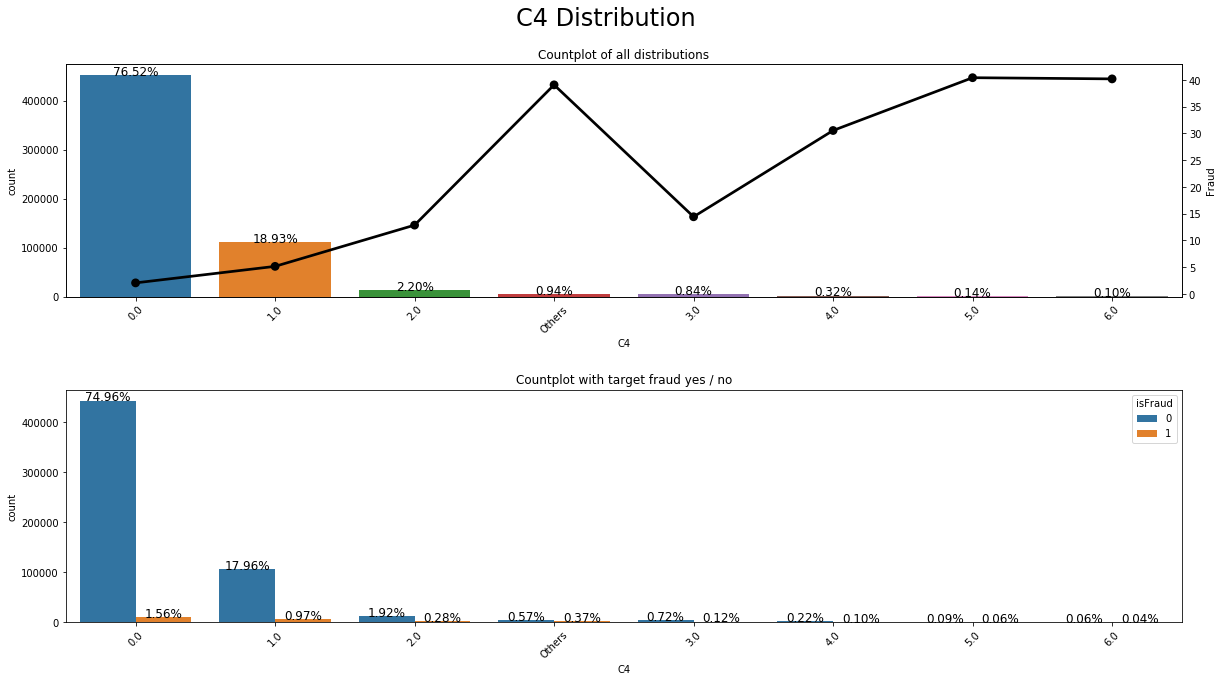

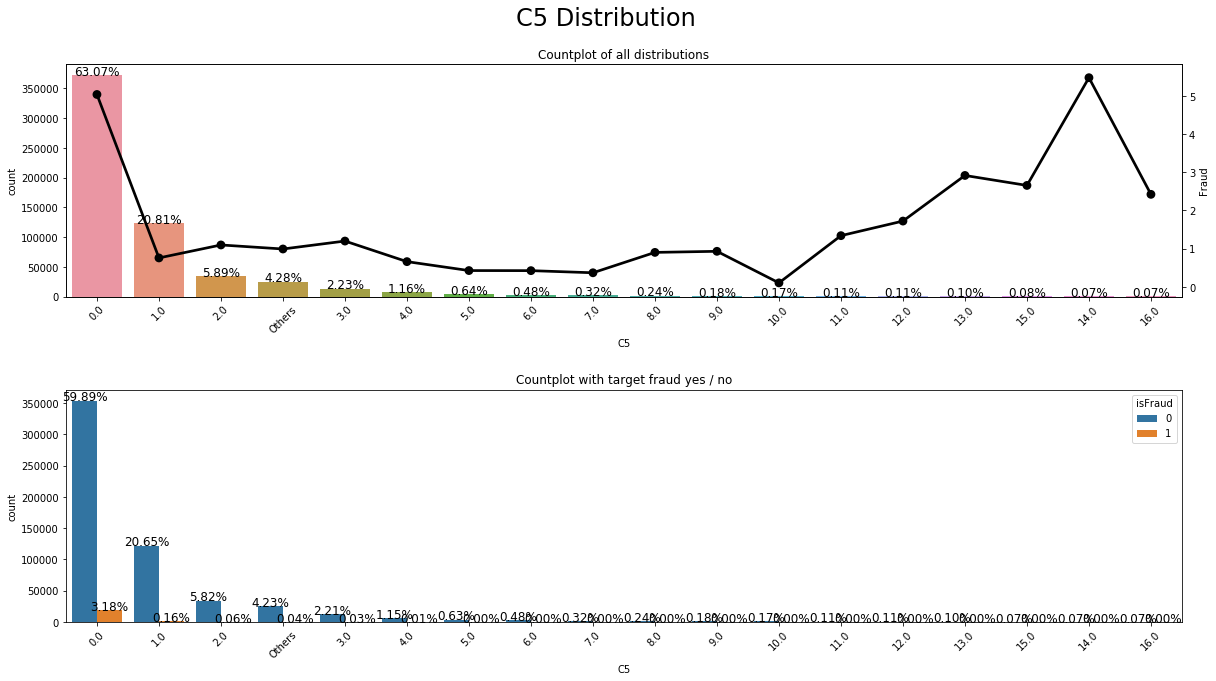

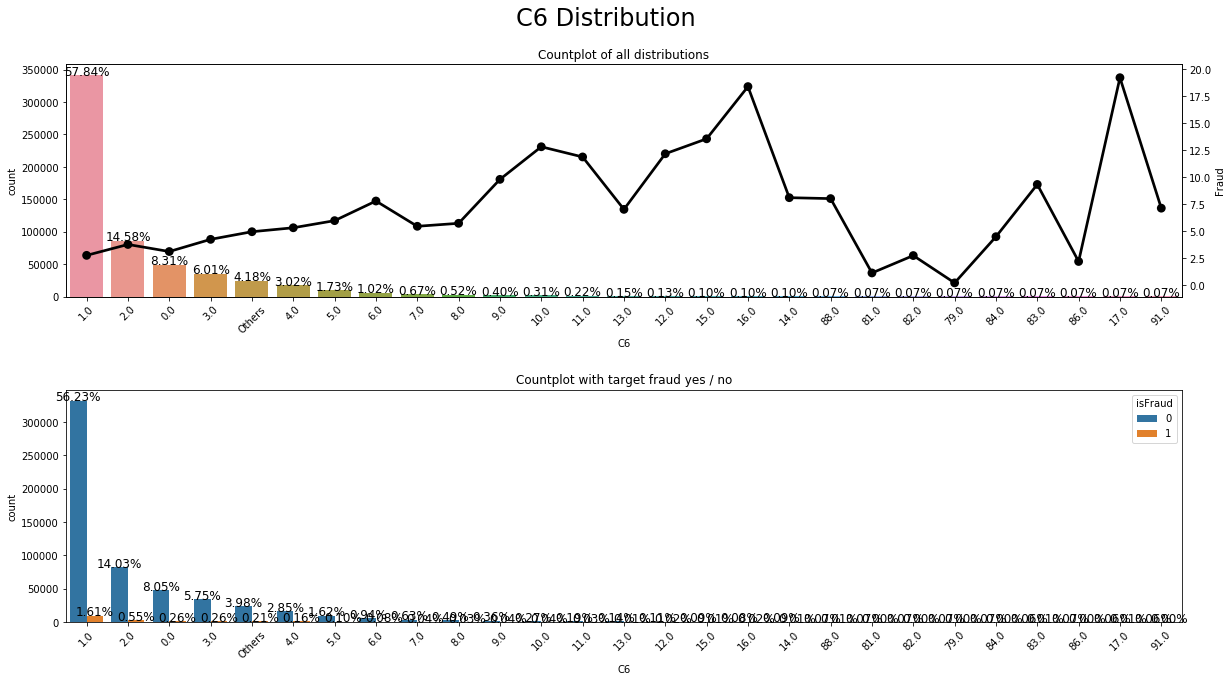

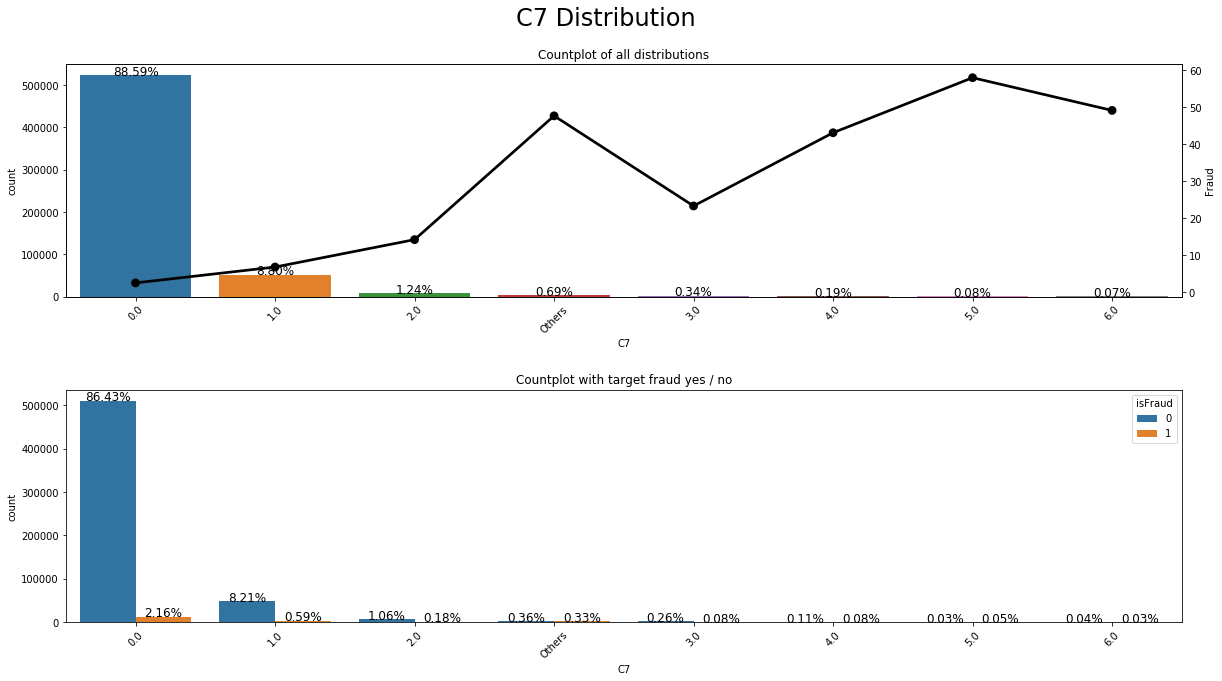

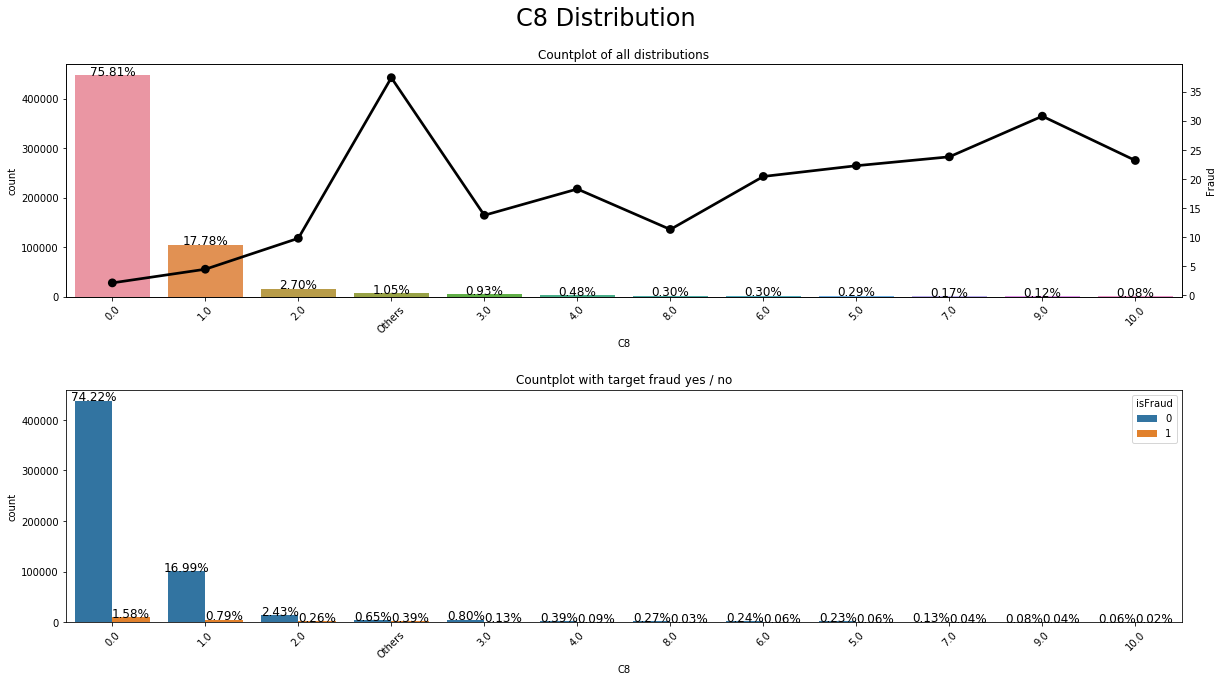

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


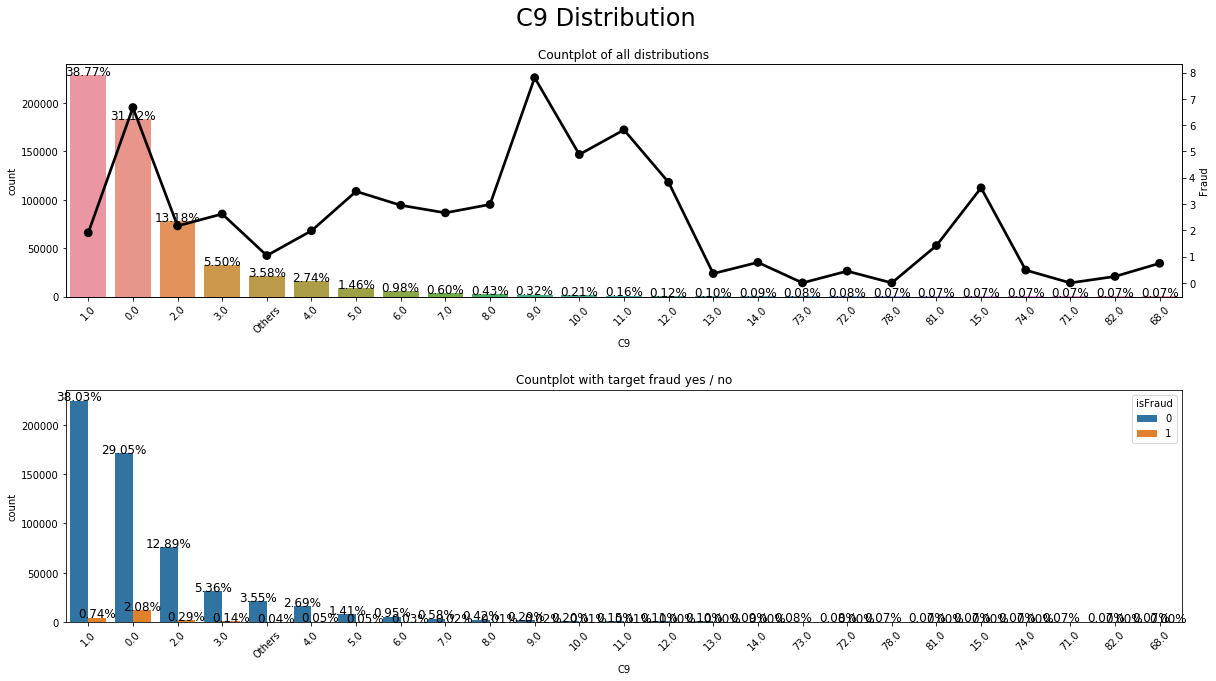

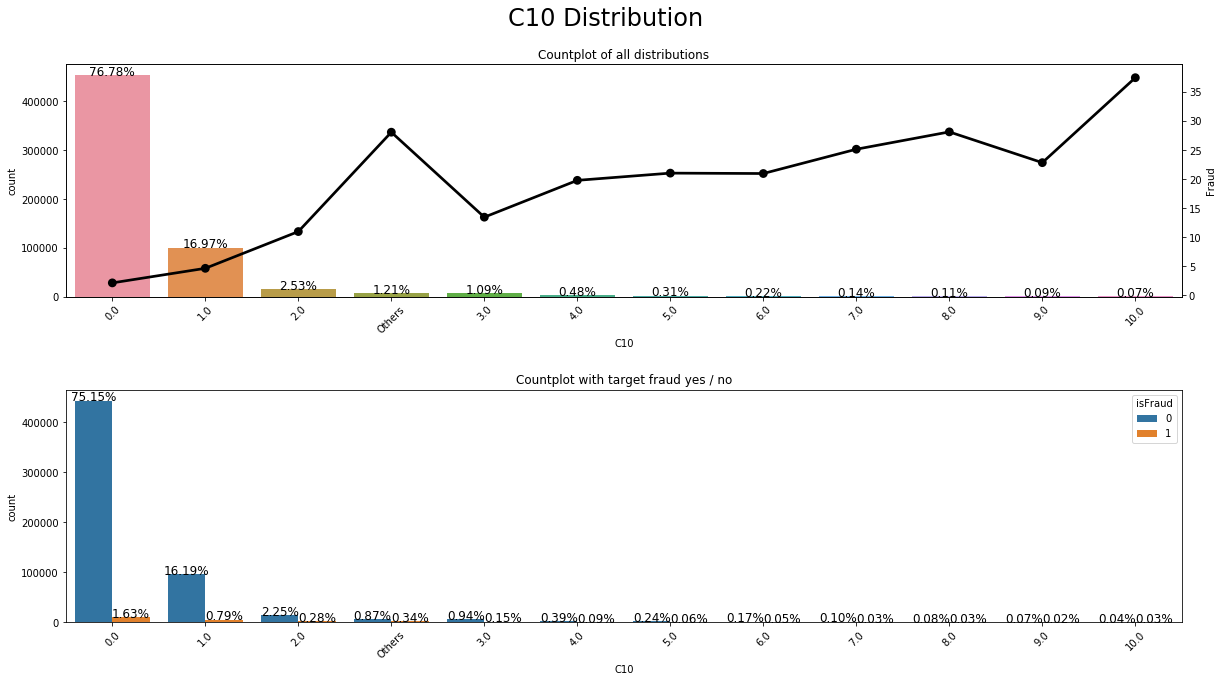

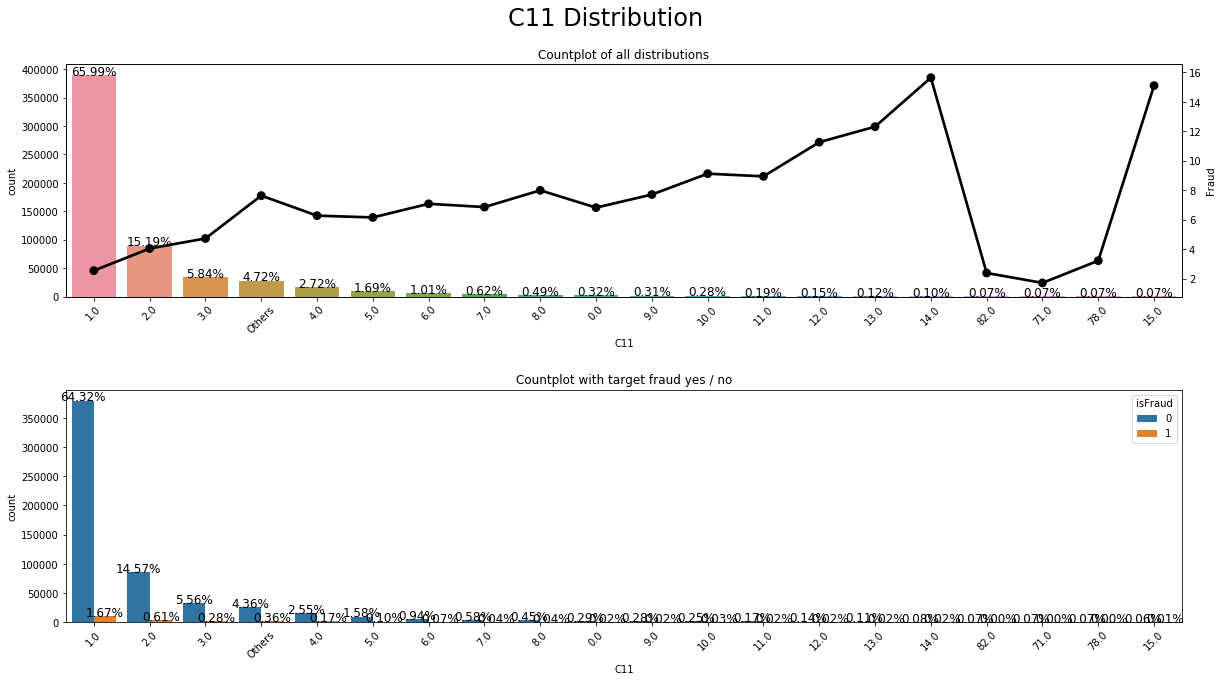

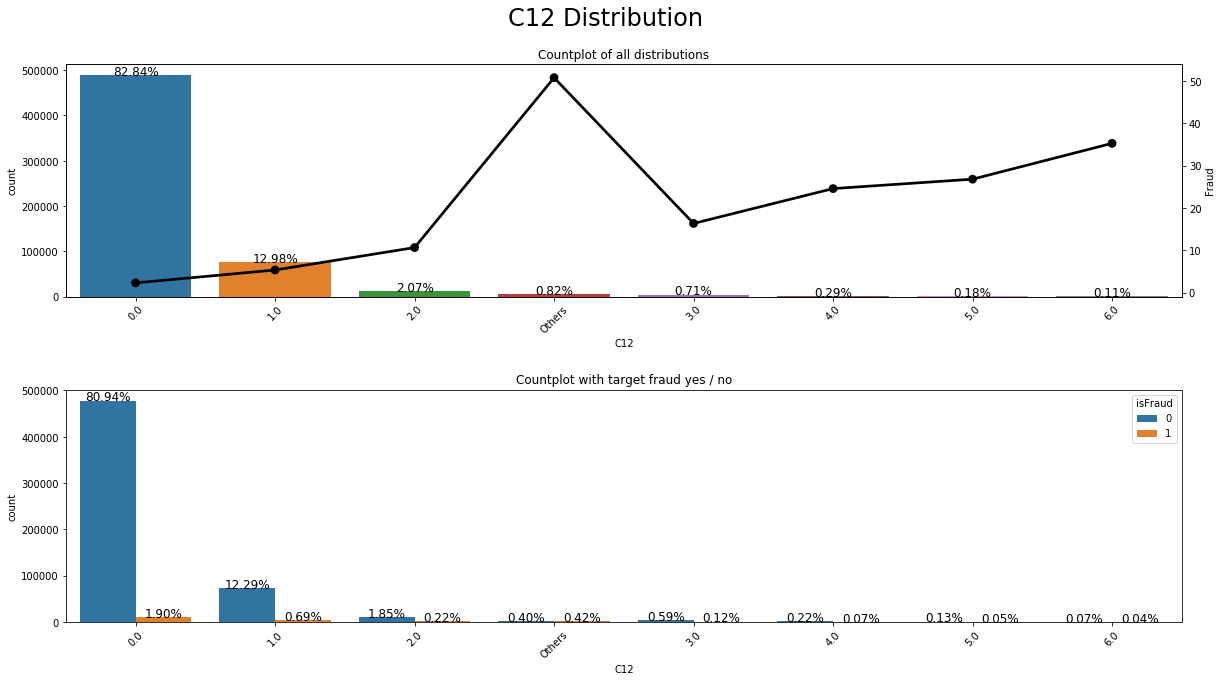

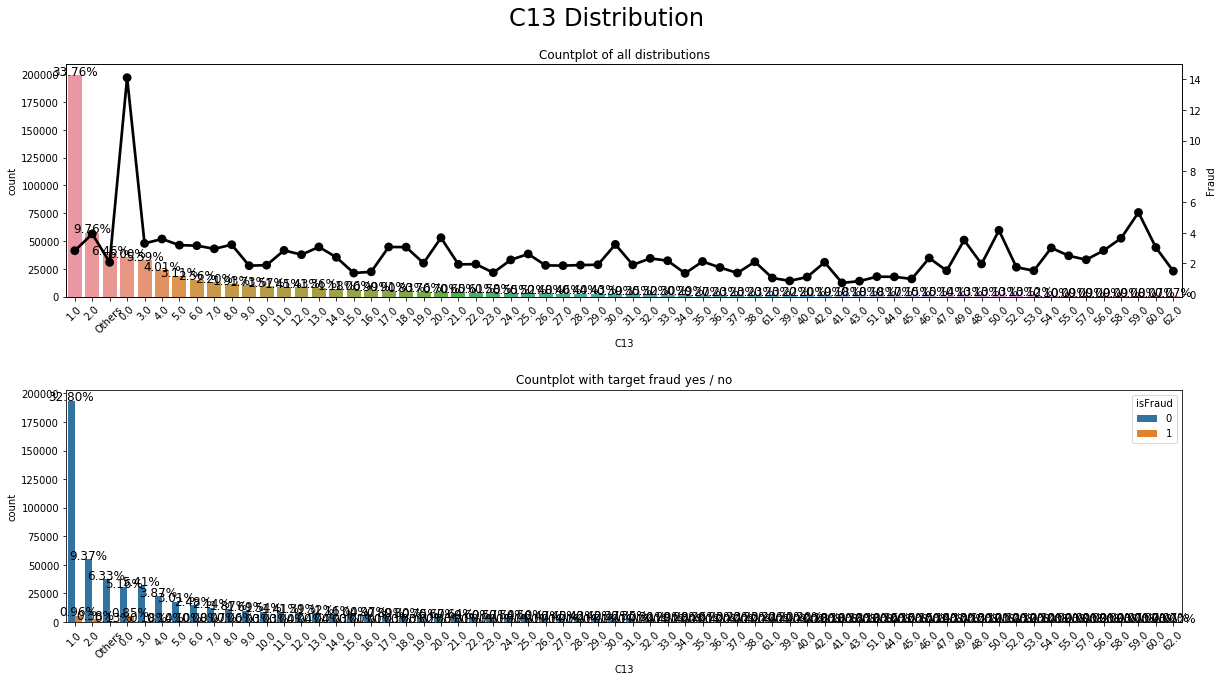

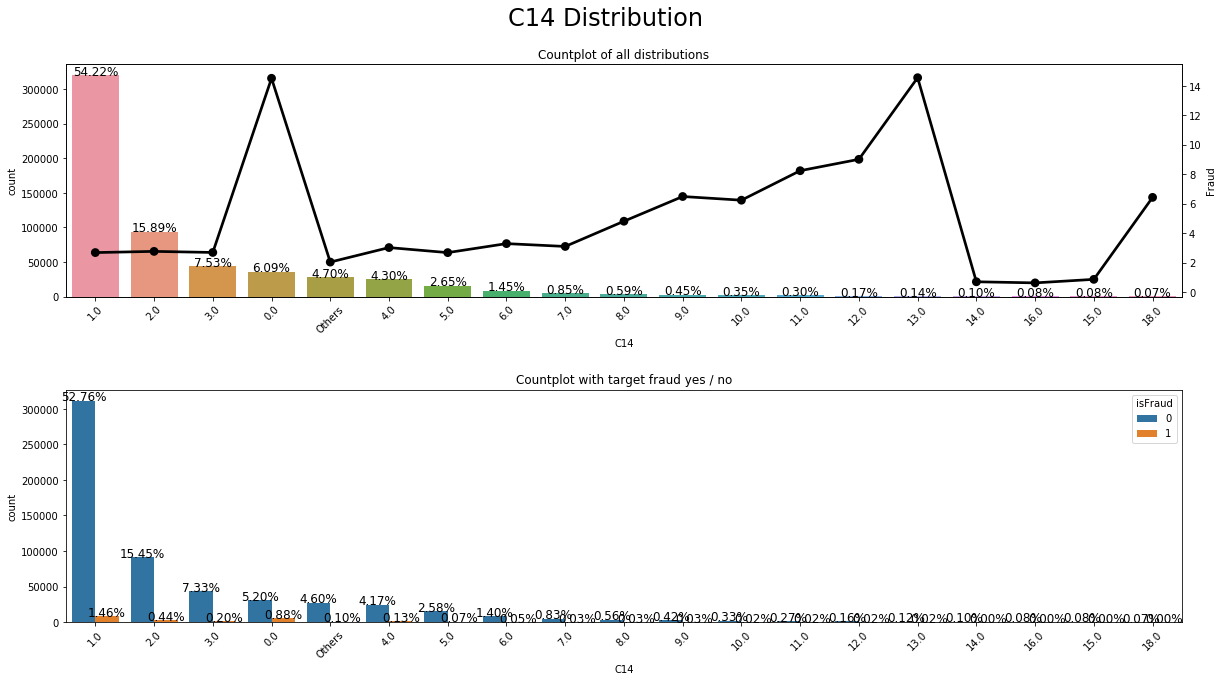

In [74]:
c_list = ["C"+str(i) for i in range(1,15,1)]
for c in c_list:
    print("Current C: ", c)
    # For all below 400 put in other category
    df_transaction.loc[df_transaction[c].isin(df_transaction[c]\
                              .value_counts()[df_transaction[c].value_counts() <= 400 ]\
                              .index), c] = "Others"
    
    # Plot basic bar plot
    # df_transaction[c].value_counts().plot(kind="bar")
    
    # Plot distribution with fraud
    plot_cnt_distribution(df_transaction, c);

## D1 - D10

- Description says it is not a categorical feature so it should be a numerical feature
- timedelta e.g. days between previous transactions

In [75]:
df_transaction.loc[:, 'D1':'D10'].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
resumetable(df_transaction.loc[:, 'D1':'D10'])

Dataset Shape: (590540, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,D1,float64,1269,641,14.0,0.0,0.0,5.57
1,D2,float64,280797,641,NaN,NaN,NaN,8.57
2,D3,float64,262878,649,13.0,NaN,NaN,5.60
3,D4,float64,168922,808,NaN,0.0,0.0,6.42
4,D5,float64,309841,688,NaN,NaN,NaN,5.95
5,D6,float64,517353,829,NaN,NaN,NaN,4.09
6,D7,float64,551623,597,NaN,NaN,NaN,4.29
7,D8,float64,515614,12353,NaN,NaN,NaN,11.32
8,D9,float64,515614,24,NaN,NaN,NaN,4.29
9,D10,float64,76022,818,13.0,0.0,0.0,6.09


In [77]:
df_transaction.loc[:, 'D1':'D10'].describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
count,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000
mean,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137
std,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.958333,0.208333,0.000000
50%,3.000000,97.000000,8.000000,26.000000,10.000000,0.000000,0.000000,37.875000,0.666666,15.000000
75%,122.000000,276.000000,27.000000,253.000000,32.000000,40.000000,17.000000,187.958328,0.833333,197.000000
max,640.000000,640.000000,819.000000,869.000000,819.000000,873.000000,843.000000,1707.791626,0.958333,876.000000


## M1-M9

- Match, such as names on card, adrdress, etc.
- Categorical

In [85]:
df_transaction.loc[:, 'M1':'M9'].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
resumetable(df_transaction.loc[:, 'M1':'M9'])

Dataset Shape: (590540, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,M1,object,271100,2,T,NaN,T,0.00
1,M2,object,271100,2,T,NaN,T,0.49
2,M3,object,271100,2,T,NaN,T,0.75
3,M4,object,281444,3,M2,M0,M0,1.31
4,M5,object,350482,2,F,T,F,0.99
5,M6,object,169360,2,T,T,F,1.00
6,M7,object,346265,2,NaN,NaN,F,0.57
7,M8,object,346252,2,NaN,NaN,F,0.95
8,M9,object,346252,2,NaN,NaN,F,0.63


In [88]:
df_transaction.loc[:, 'M1':'M9'].fillna('No_Info', inplace=True)

In [79]:
list(df_transaction.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V